# Decision Tree Classification

## Importing the libraries

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns


## Importing the dataset

In [87]:
dataset = pd.read_csv('hmeq.csv')
dataset.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [88]:
## Looking data shape
print(dataset.shape)

(5960, 13)


In [89]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [90]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


In [91]:
dataset.isnull().sum().sort_values(ascending=False)

DEBTINC    1267
DEROG       708
DELINQ      580
MORTDUE     518
YOJ         515
NINQ        510
CLAGE       308
JOB         279
REASON      252
CLNO        222
VALUE       112
BAD           0
LOAN          0
dtype: int64

In [92]:
## burada her değişkenin içindeki eksik değer oranını buluyoruz
## 1- eksik değerleri olan özelliklerin listesini yapın
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>0]
## 2- özellik adını ve eksik değerlerin yüzdesini yazdırın

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % eksik değer')

MORTDUE 0.0869  % eksik değer
VALUE 0.0188  % eksik değer
REASON 0.0423  % eksik değer
JOB 0.0468  % eksik değer
YOJ 0.0864  % eksik değer
DEROG 0.1188  % eksik değer
DELINQ 0.0973  % eksik değer
CLAGE 0.0517  % eksik değer
NINQ 0.0856  % eksik değer
CLNO 0.0372  % eksik değer
DEBTINC 0.2126  % eksik değer


In [93]:
# sayısal değişkenlerin listesi
numerical_features_1 = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features_1))

# sayısal değişkenleri görelim
dataset[numerical_features_1].head()

Number of numerical variables:  11


,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [94]:
import missingno as msn

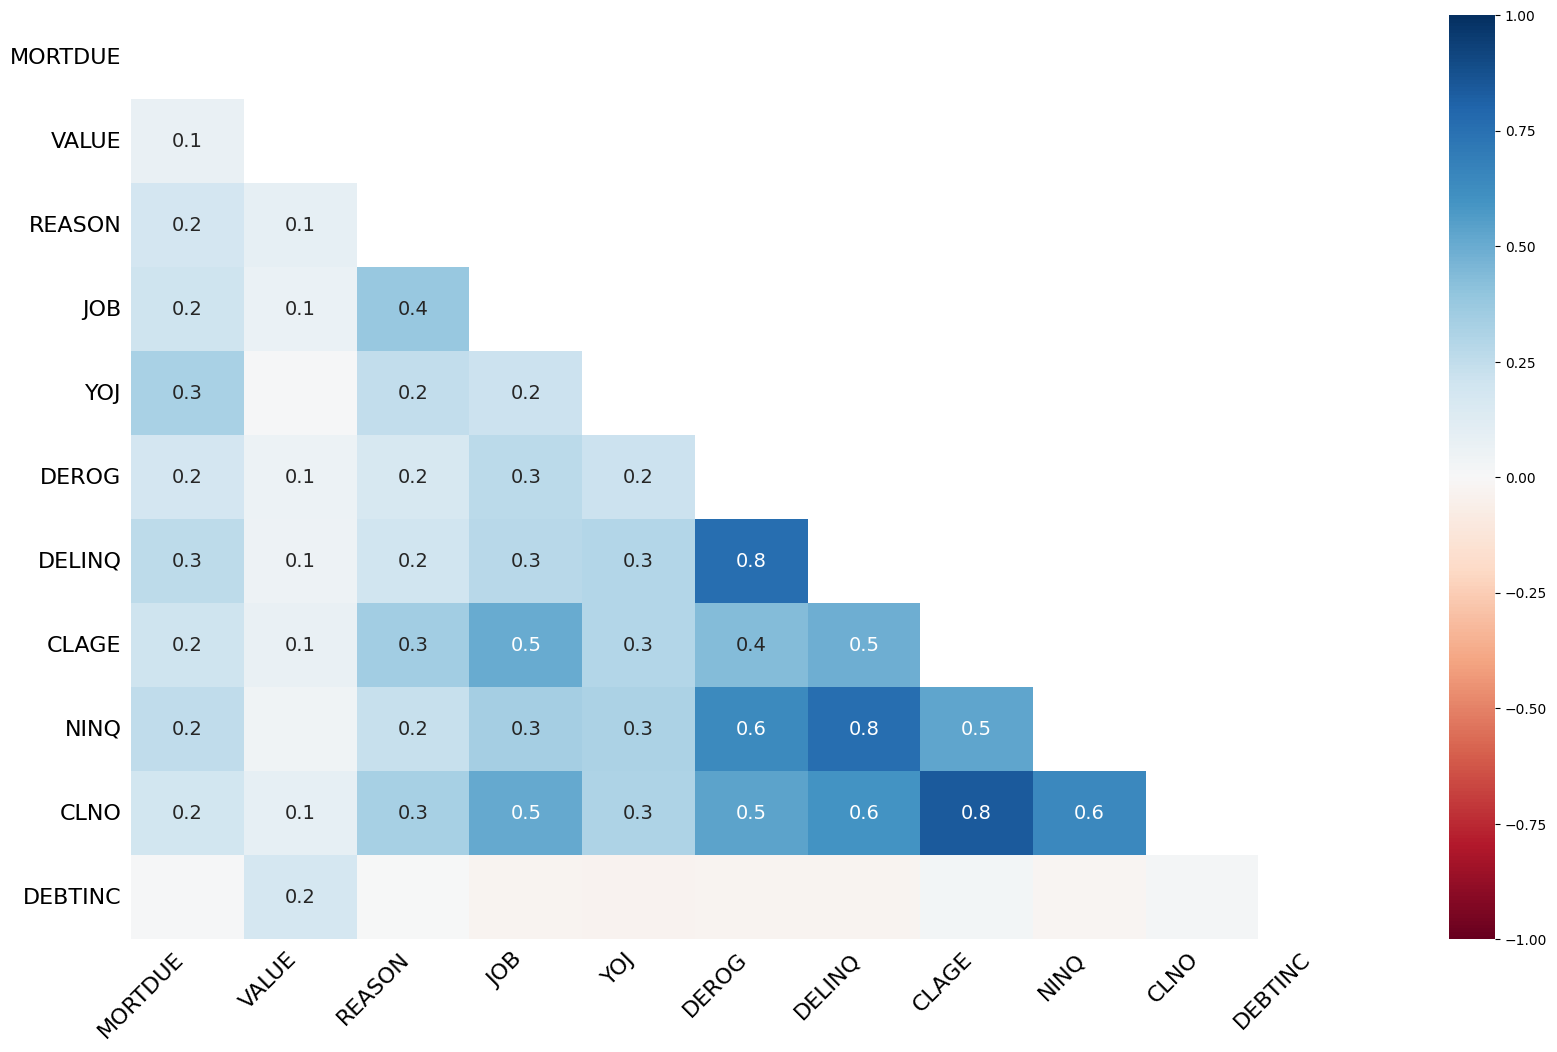

In [95]:
msn.heatmap(dataset[features_with_na]);

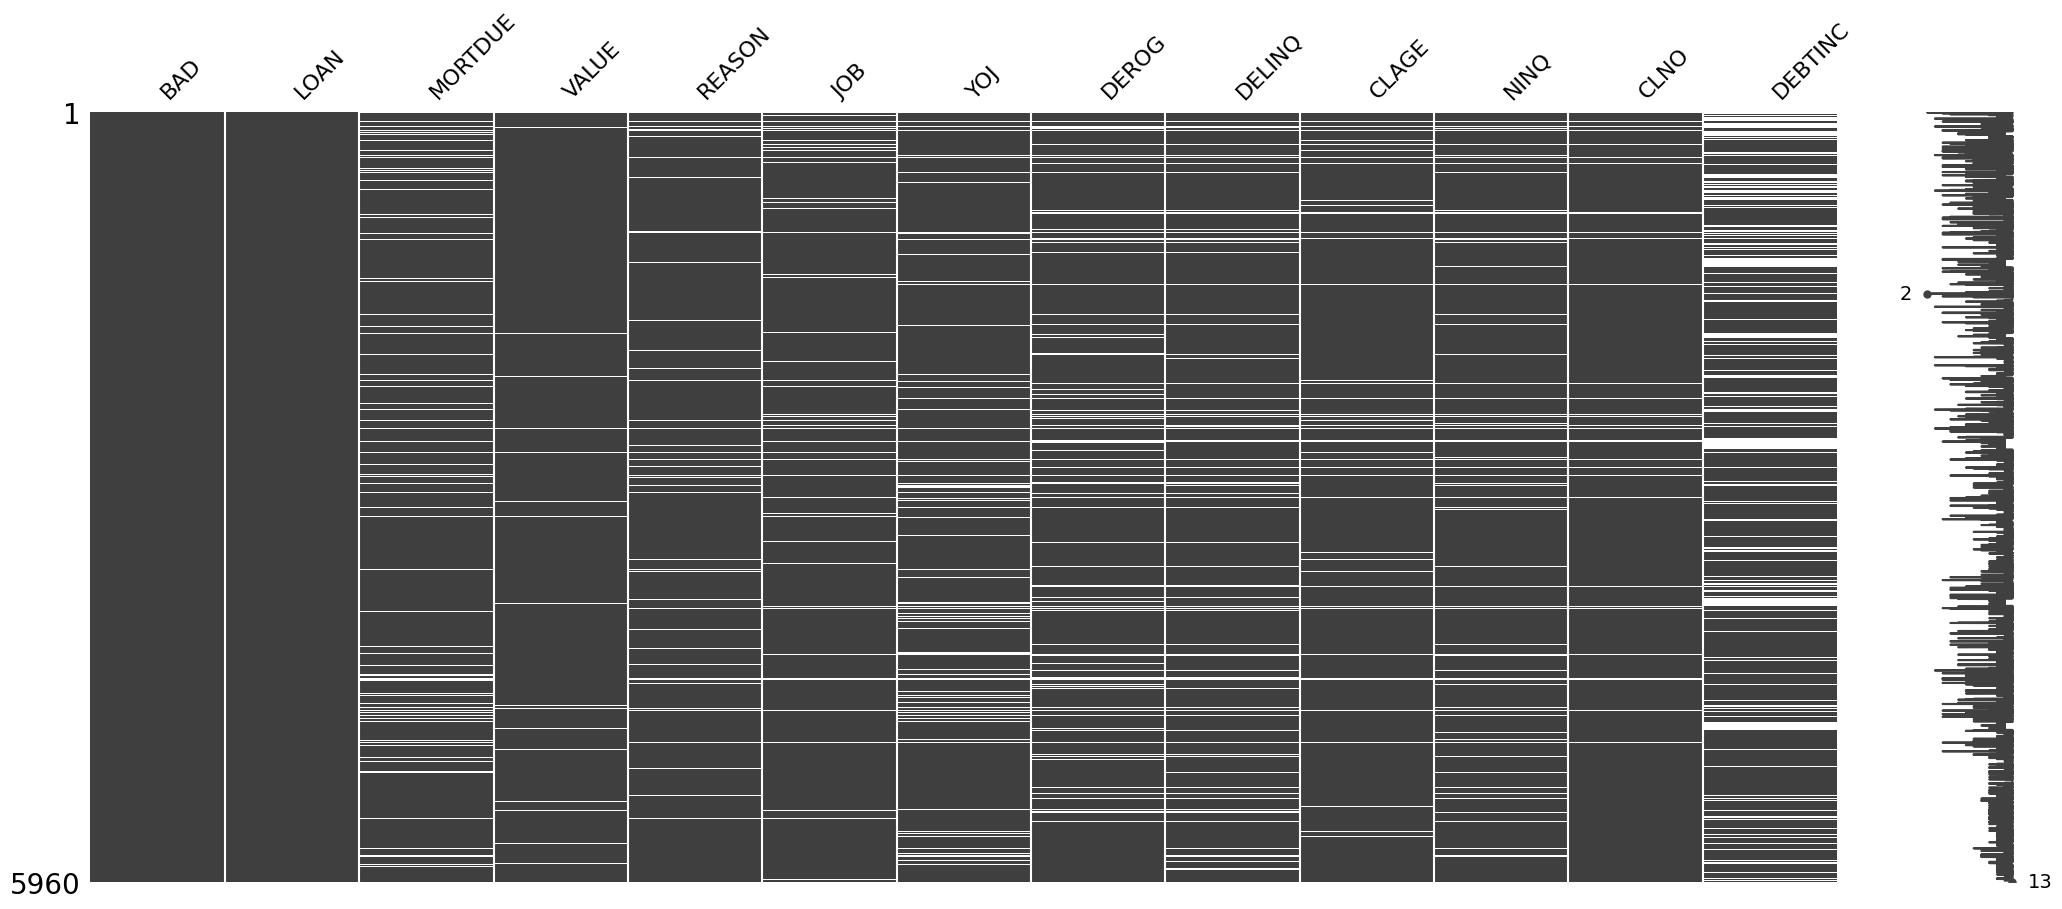

In [96]:
msn.matrix(dataset);

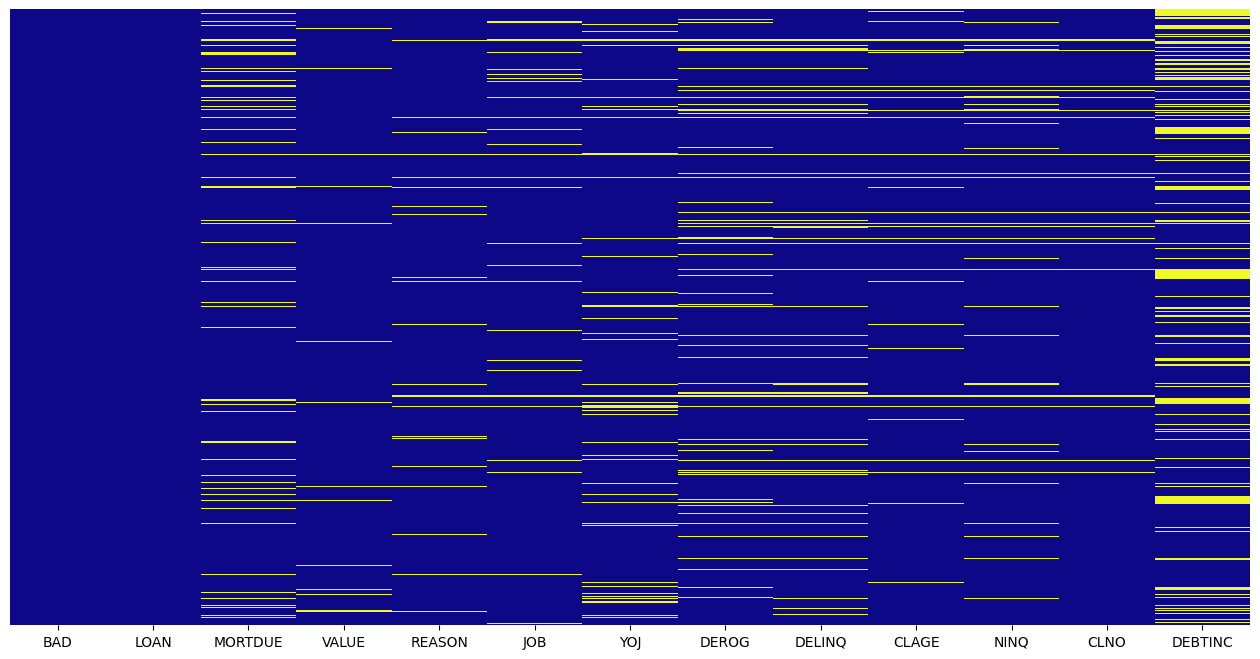

In [97]:
plt.rcParams["figure.figsize"] = (16, 8)
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap="plasma");

##Missing value

In [98]:
dataset.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [99]:
#CLNO sutunu ile CLAGE bir biri ile bagli ve NINQ   CLAGE: Ay cinsinden en eski kredi limitinin yaşı, NINQ: Son kredi sorgularının sayısı, CLNO: Kredi limiti sayısı
# CLNO sütunundaki NaN değerlere 0 verme
dataset["CLNO"].fillna(0, inplace=True)

# CLNO sütunundaki 0 değerine denk gelen satırların CLAGE sütunundaki NaN değerlerini 0 ile doldurma
dataset.loc[dataset["CLNO"] == 0, "CLAGE"] = 0

# Geri kalan NaN değerlere ilgili sütunların ortalamasını uygulama
columns_to_fillna_mean = ["CLAGE"]
for column in columns_to_fillna_mean:
    dataset[column].fillna(dataset[column].mean(), inplace=True)


In [100]:
correlation_matrix = dataset[['NINQ', 'DELINQ']].corr()
print(correlation_matrix)


            NINQ    DELINQ
NINQ    1.000000  0.067812
DELINQ  0.067812  1.000000


In [101]:
#Toplam Geciken Kredi ve Sorgu Sayısı:NINQ ve DELINQ'yi toplam geciken kredi ve sorgu sayısını temsil eden bir değişkenle değiştirlebili gibi
dataset['NINQ'].fillna(0, inplace=True)
dataset['DELINQ'].fillna(0, inplace=True)
dataset['TOTAL_DQ_INQ'] = dataset['DELINQ'] + dataset['NINQ']


In [102]:
# buyuk asaglayci rapor anlaminda, man yerine 0 atamak mantikli geldi
dataset['DEROG'].fillna(0, inplace=True)

In [103]:
dataset['DEBTINC'].fillna(0, inplace=True)

In [104]:
#numeric variables
columns_to_fillna = [ "MORTDUE", "YOJ", "VALUE"]

for column in columns_to_fillna:
    dataset[column].fillna(dataset[column].mean(), inplace=True)


One hot encoding for categoric features

In [105]:
dataset = pd.get_dummies(dataset, columns=["REASON", "JOB"], prefix=["REASON", "JOB"], drop_first=True)

In [106]:
dataset.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,TOTAL_DQ_INQ,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0000,39025.000000,10.500000,0.0,0.0,94.366667,1.0,9.0,0.0,1.0,True,False,True,False,False,False
1,1,1300,70053.0000,68400.000000,7.000000,0.0,2.0,121.833333,0.0,14.0,0.0,2.0,True,False,True,False,False,False
2,1,1500,13500.0000,16700.000000,4.000000,0.0,0.0,149.466667,1.0,10.0,0.0,1.0,True,False,True,False,False,False
3,1,1500,73760.8172,101776.048741,8.922268,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,False,False,False,False,False,False
4,0,1700,97800.0000,112000.000000,3.000000,0.0,0.0,93.333333,0.0,14.0,0.0,0.0,True,True,False,False,False,False


In [107]:
dataset.drop("JOB_Other", axis=1, inplace=True)

In [108]:
# True ve False değerlerini 1 ve 0 olarak değiştirme
dataset['REASON_HomeImp'] = dataset['REASON_HomeImp'].replace({True: 1, False: 0})
dataset['JOB_Office'] = dataset['JOB_Office'].replace({True: 1, False: 0})
dataset['JOB_ProfExe'] = dataset['JOB_ProfExe'].replace({True: 1, False: 0})
dataset['JOB_Sales'] = dataset['JOB_Sales'].replace({True: 1, False: 0})
dataset['JOB_Self'] = dataset['JOB_Self'].replace({True: 1, False: 0})

In [109]:
dataset['REASON_HomeImp'].fillna(0, inplace=True)
dataset['JOB_Office'].fillna(0, inplace=True)
dataset['JOB_ProfExe'].fillna(0, inplace=True)
dataset['JOB_Sales'].fillna(0, inplace=True)
dataset['JOB_Self'].fillna(0, inplace=True)

In [110]:
# Eksik değer kontrolü
dataset.isnull().sum().sum()

0

## Outliers

In [111]:
# Sütunlara isim verme
data_col = dataset[['LOAN', 'MORTDUE', 'VALUE', 'YOJ']]  #'CLAGE', 'CLNO','DEBTINC'

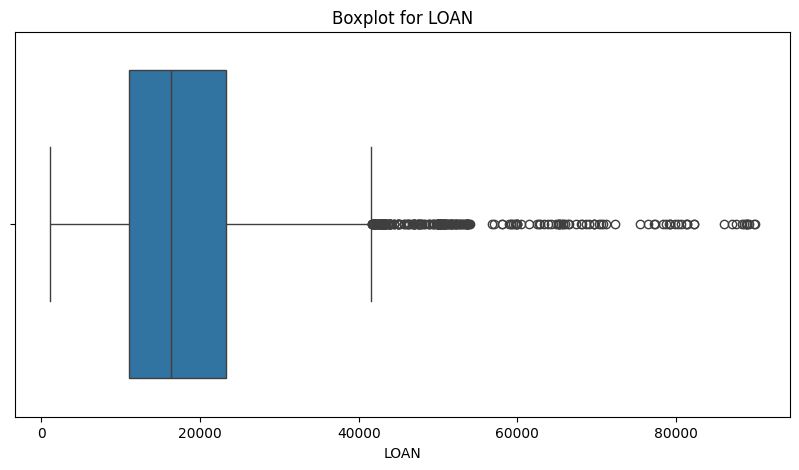

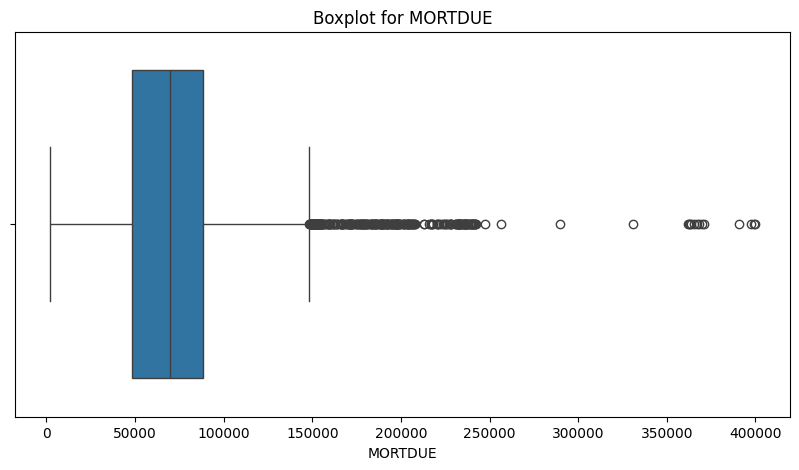

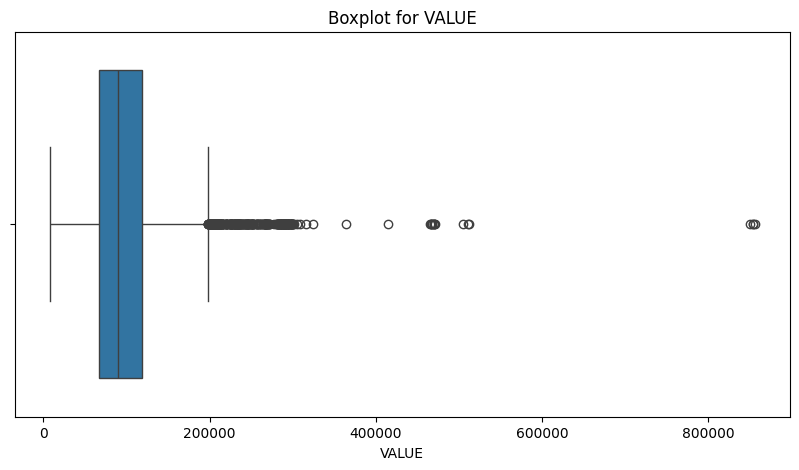

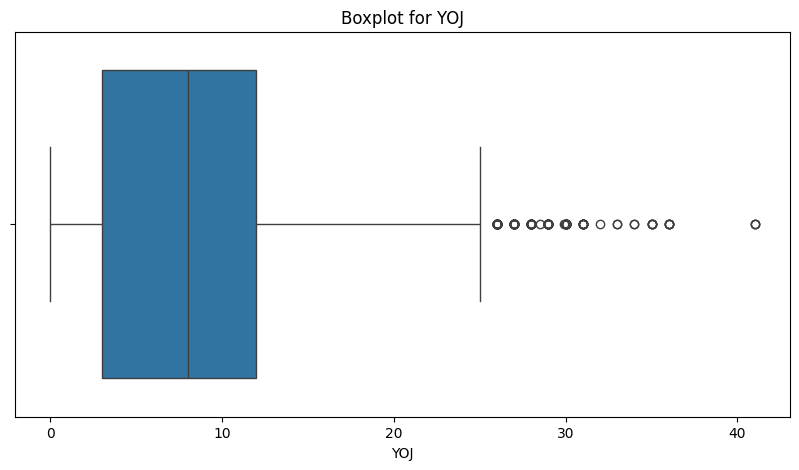

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 5)

data = dataset.copy()

for feature in data_col:
    sns.boxplot(x=data[feature])
    plt.xlabel(feature)
    plt.title(f'Boxplot for {feature}')
    plt.show()


In [113]:

# data_col listesini oluşturun (örnek isimlerle)
data_col = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ']

# Her bir sürekli numerik değişken için outlier'ları baskılayan bir for döngüsü
for column in data_col:
    # Alt ve üst sınırları belirleyin (örneğin, 5. ve 95. percentil)
    q1 = dataset[column].quantile(0.25)
    q3 = dataset[column].quantile(0.75)

    IQR = q3 - q1

    lower_limit = q1 - 1.5*IQR
    upper_limit = q3 + 1.5*IQR

    # Alt sınırdan küçük olan değerleri alt sınıra eşitle
    dataset[column] = dataset[column].apply(lambda x: lower_limit if x < lower_limit else x)
    
    # Üst sınırdan büyük olan değerleri üst sınıra eşitle
    dataset[column] = dataset[column].apply(lambda x: upper_limit if x > upper_limit else x)

# Sonuçları göster
dataset[data_col].head()


,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1100.0,25860.0000,39025.000000,10.500000,0.0,0.0,94.366667,1.0,9.0,0.0
1,1300.0,70053.0000,68400.000000,7.000000,0.0,0.0,121.833333,0.0,14.0,0.0
2,1500.0,13500.0000,16700.000000,4.000000,0.0,0.0,149.466667,1.0,10.0,0.0
3,1500.0,73760.8172,101776.048741,8.922268,0.0,0.0,0.000000,0.0,0.0,0.0
4,1700.0,97800.0000,112000.000000,3.000000,0.0,0.0,93.333333,0.0,14.0,0.0


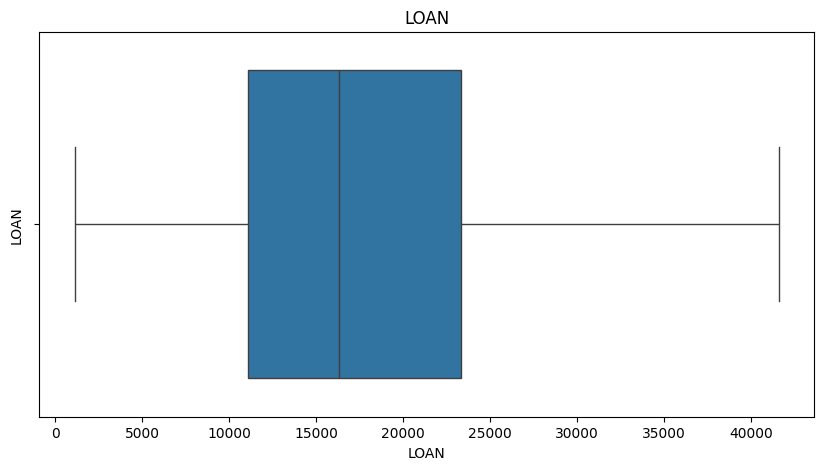

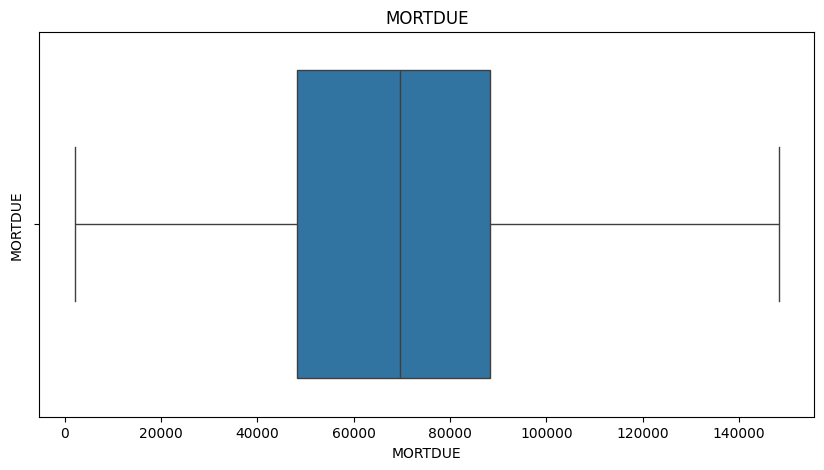

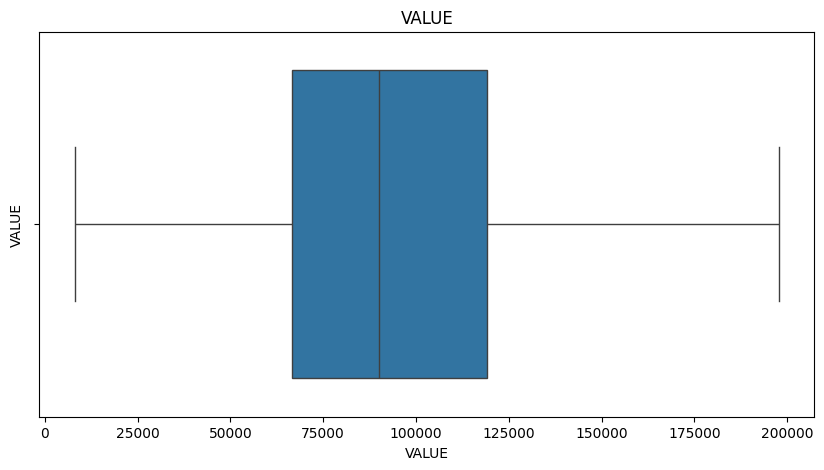

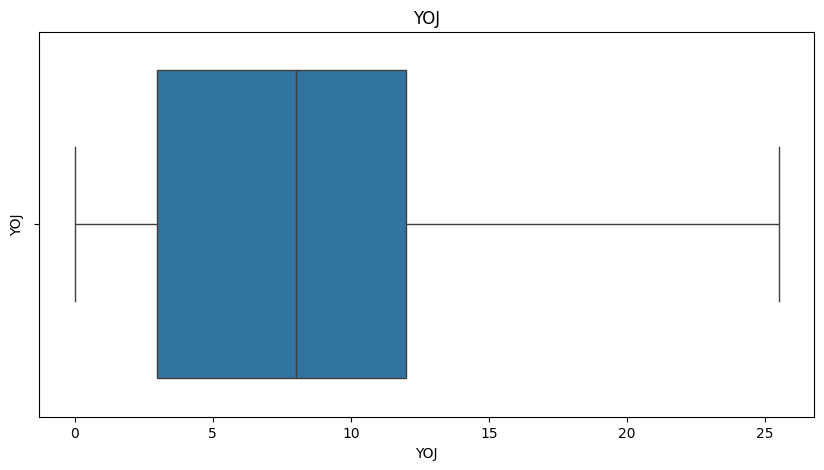

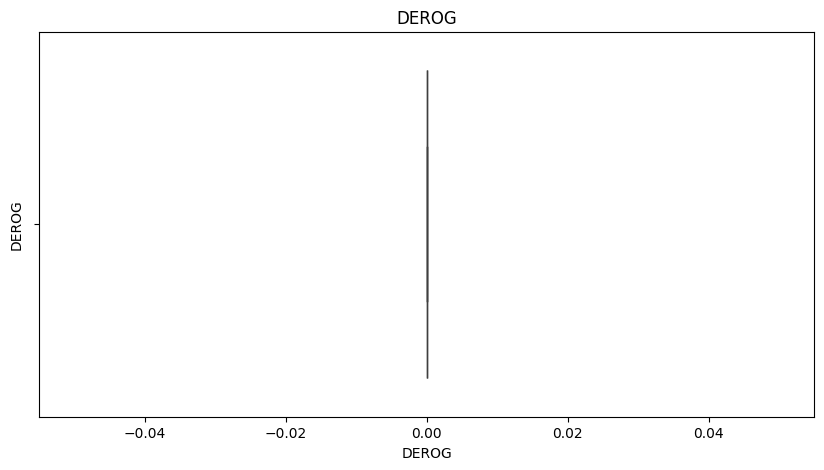

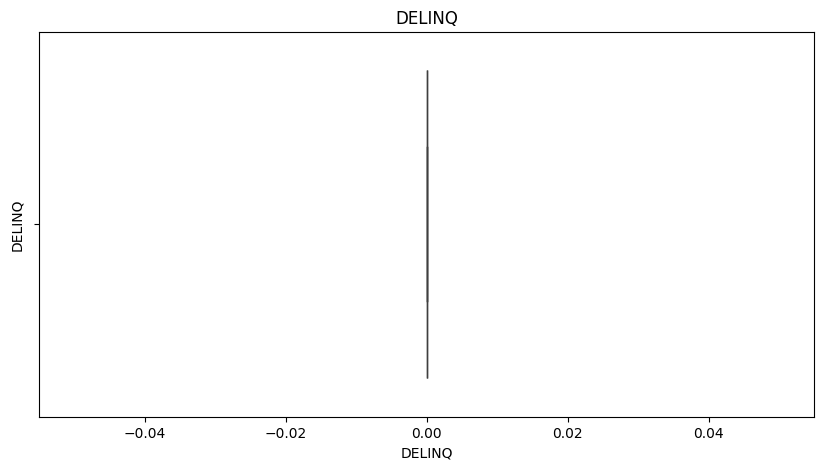

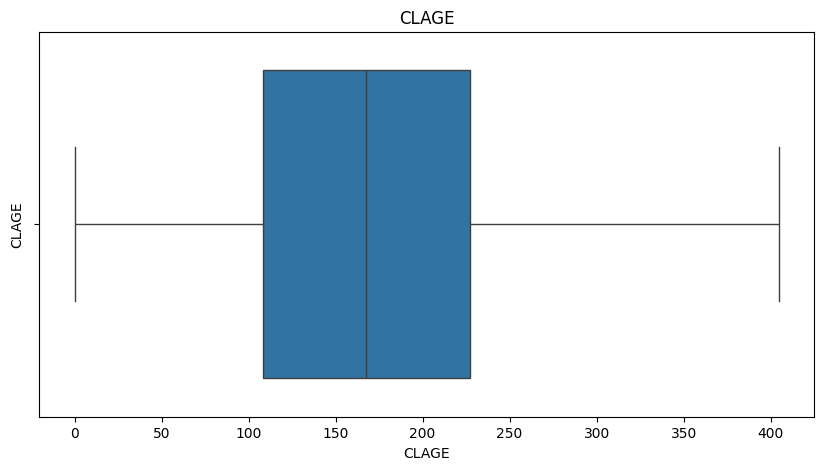

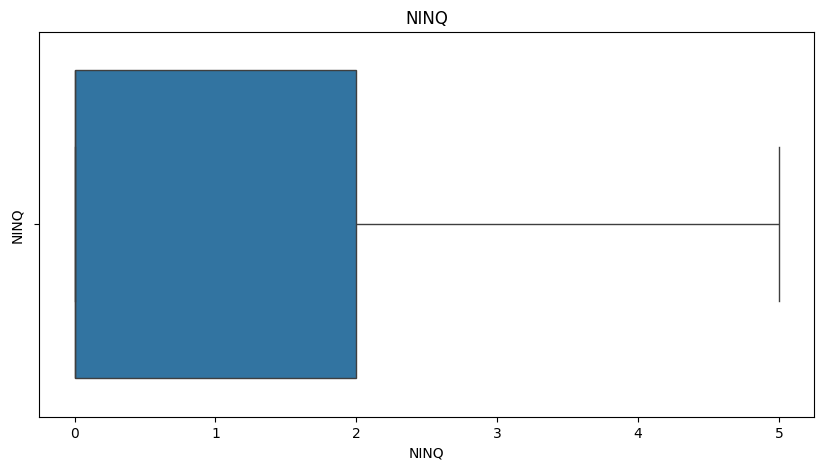

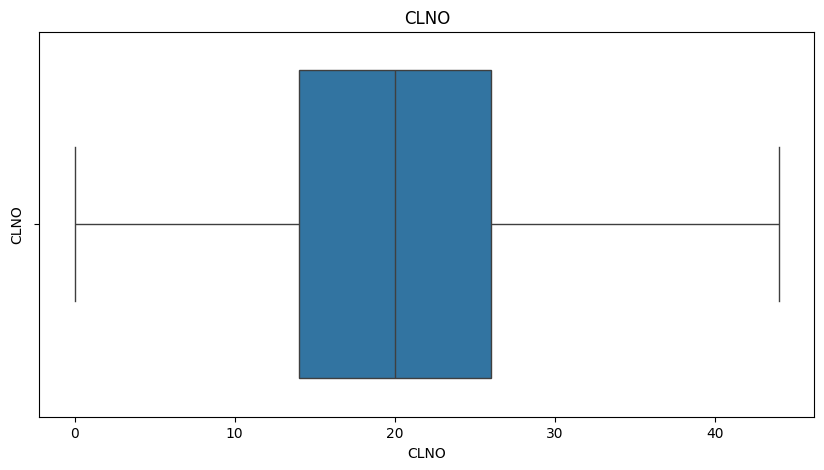

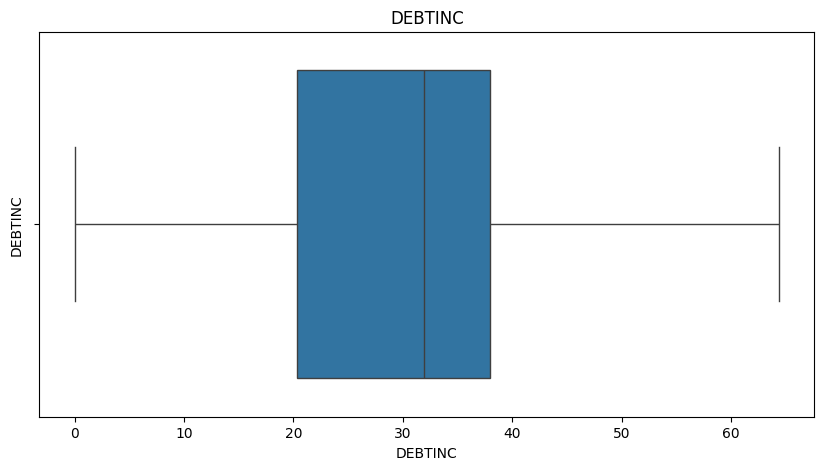

In [114]:
for feature in data_col:
    # data.boxplot(column=feature)
    sns.boxplot(dataset[feature], orient='h')
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

## Dağılımı Gözlemleme ve Dönüşümler

In [115]:
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.special import boxcox1p

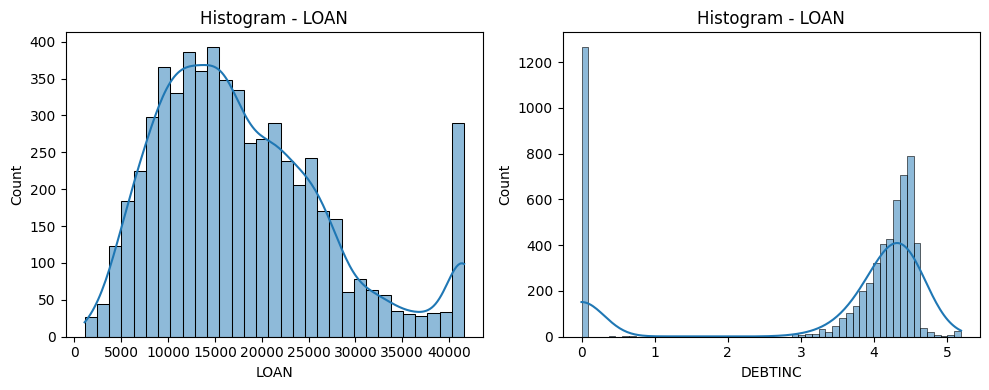

LOAN: Çarpıklık (Skewness): 0.8321798412166389, Basıklık (Kurtosis): 0.27185213969280353


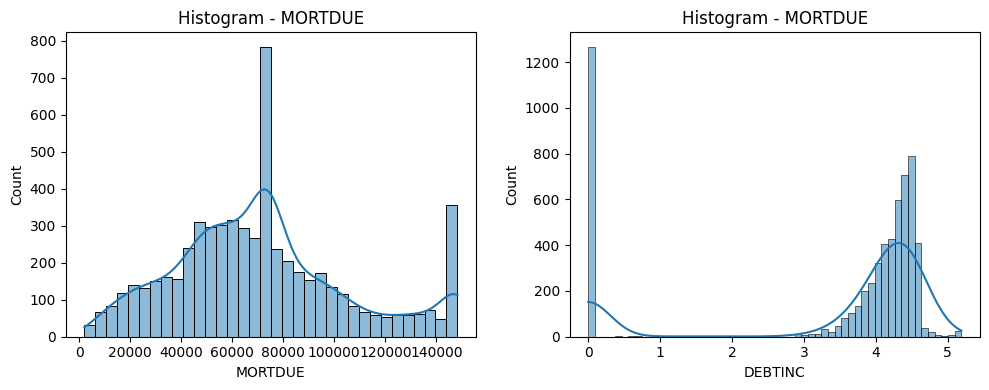

MORTDUE: Çarpıklık (Skewness): 0.5524346878853066, Basıklık (Kurtosis): -0.08923743902027814


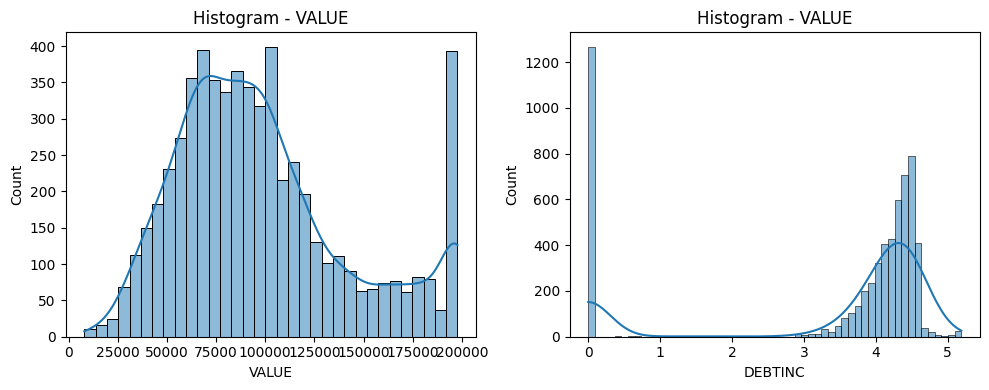

VALUE: Çarpıklık (Skewness): 0.7559409244064473, Basıklık (Kurtosis): -0.11802491385057401


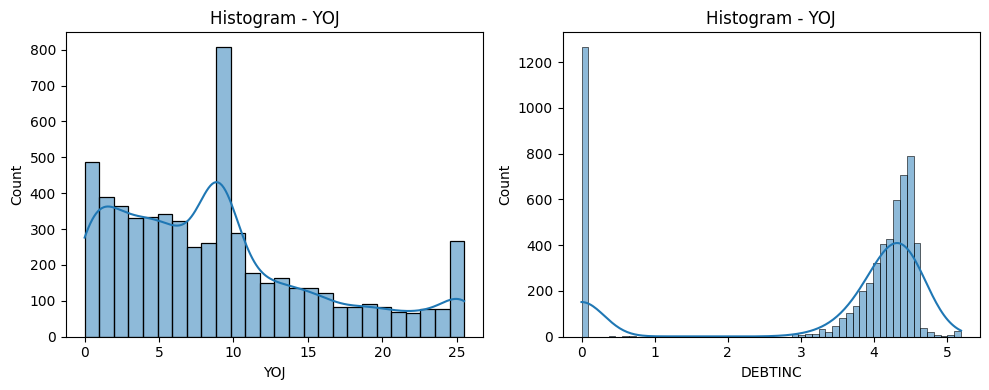

YOJ: Çarpıklık (Skewness): 0.8418751328300857, Basıklık (Kurtosis): -0.05294593636646905


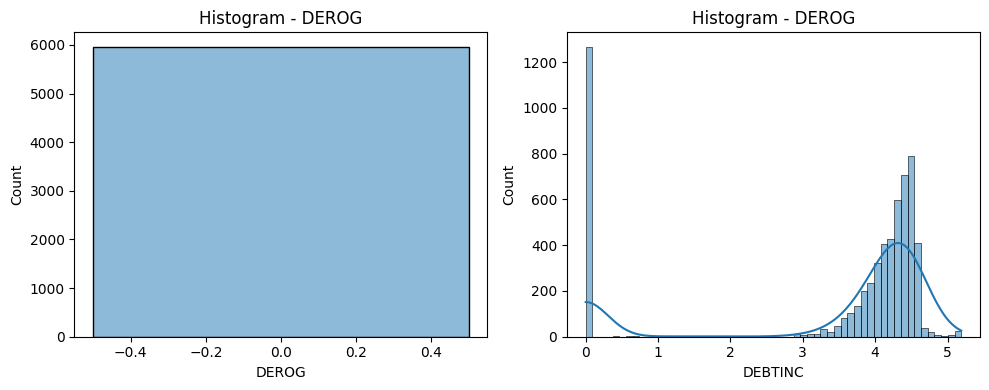

DEROG: Çarpıklık (Skewness): nan, Basıklık (Kurtosis): nan


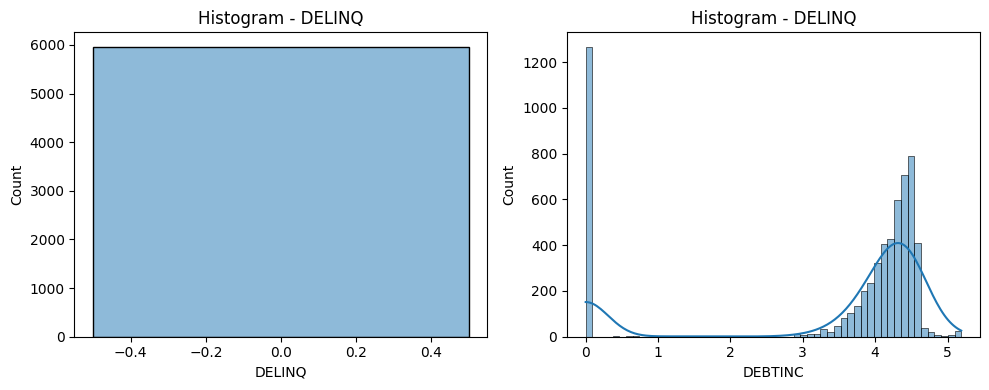

DELINQ: Çarpıklık (Skewness): nan, Basıklık (Kurtosis): nan


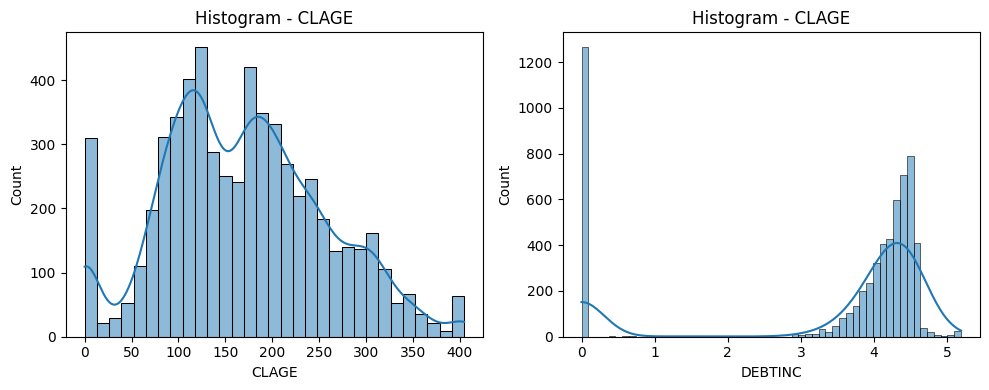

CLAGE: Çarpıklık (Skewness): 0.24597067234289588, Basıklık (Kurtosis): -0.24848366924280896


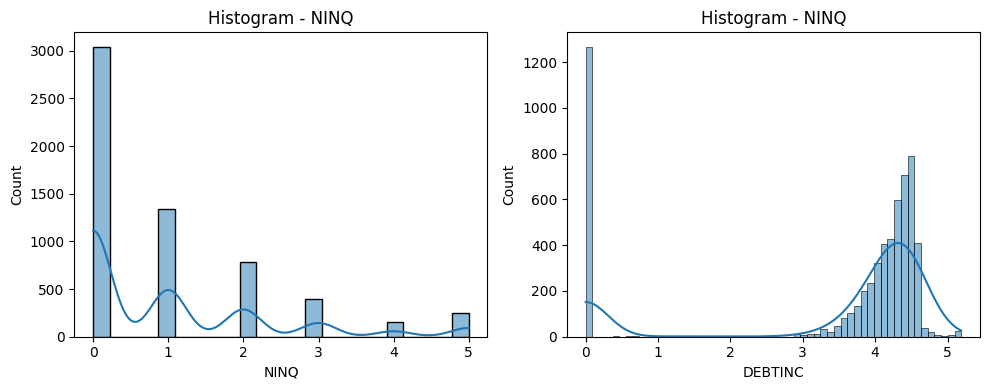

NINQ: Çarpıklık (Skewness): 1.4545740912405198, Basıklık (Kurtosis): 1.4379456673721593


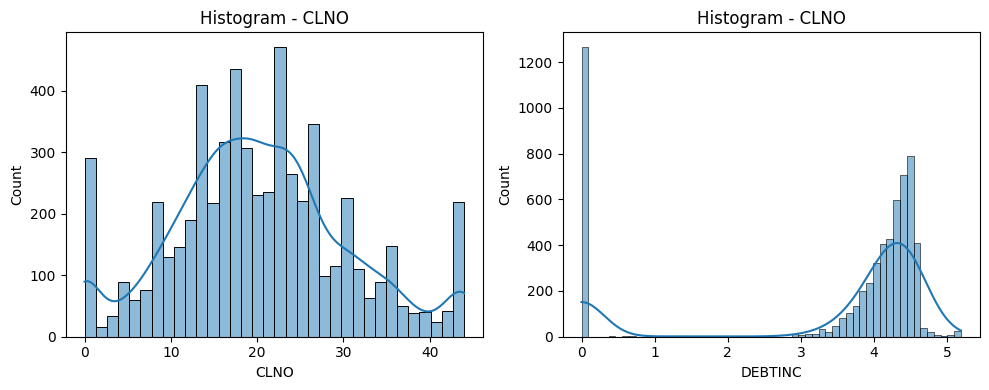

CLNO: Çarpıklık (Skewness): 0.23429283002917287, Basıklık (Kurtosis): -0.08332216672832748


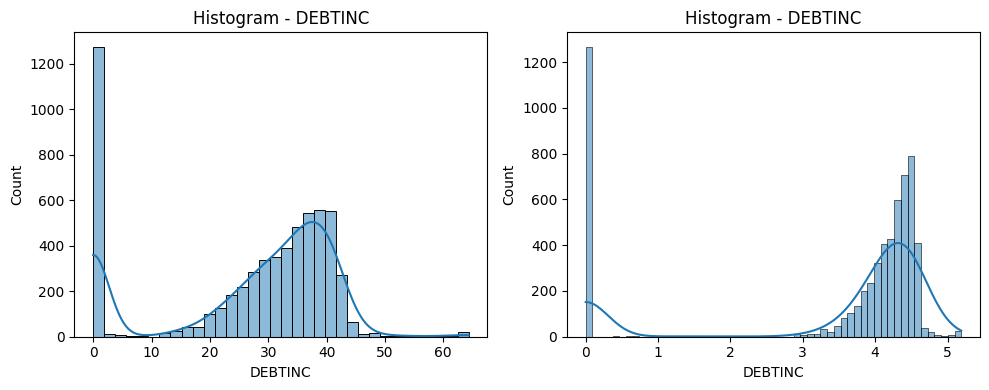

DEBTINC: Çarpıklık (Skewness): -0.7883816679204171, Basıklık (Kurtosis): -0.6508107513433092


In [116]:
# Her sütun için çarpıklık ve basıklık değerlerini görselleştir
for column in dataset[data_col]:
    skewness = skew(dataset[column])
    kurt = kurtosis(dataset[column])

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    sns.histplot(dataset[column], ax=axes[0], kde=True)
    axes[0].set_title(f'Histogram - {column}')

    # sns.histplot(np.log(dataset[column]), ax=axes[1], kde=True)
    # axes[1].set_title(f'Histogram - {column}')

    # sns.histplot(1/dataset[feature], ax=axes[1], kde=True)
    # axes[1].set_title(f'Histogram - {column}')

    #sns.histplot(dataset[feature]**2, ax=axes[1], kde=True)
    #axes[1].set_title(f'Histogram - {column}')

    sns.histplot(boxcox1p(dataset[feature], 0.1), ax=axes[1], kde=True)
    axes[1].set_title(f'Histogram - {column}')

    # sns.boxplot(x=dataset[column], ax=axes[1])
    # axes[1].set_title(f'Boxplot - {column}')

    plt.tight_layout()
    plt.show()

    print(f"{column}: Çarpıklık (Skewness): {skewness}, Basıklık (Kurtosis): {kurt}")

In [117]:
dataset.head(10)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,TOTAL_DQ_INQ,REASON_HomeImp,JOB_Office,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100.0,25860.0000,39025.000000,10.500000,0.0,0.0,94.366667,1.0,9.0,0.000000,1.0,1,0,0,0,0
1,1,1300.0,70053.0000,68400.000000,7.000000,0.0,0.0,121.833333,0.0,14.0,0.000000,2.0,1,0,0,0,0
2,1,1500.0,13500.0000,16700.000000,4.000000,0.0,0.0,149.466667,1.0,10.0,0.000000,1.0,1,0,0,0,0
3,1,1500.0,73760.8172,101776.048741,8.922268,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0,0,0,0,0
4,0,1700.0,97800.0000,112000.000000,3.000000,0.0,0.0,93.333333,0.0,14.0,0.000000,0.0,1,1,0,0,0
5,1,1700.0,30548.0000,40320.000000,9.000000,0.0,0.0,101.466002,1.0,8.0,37.113614,1.0,1,0,0,0,0
6,1,1800.0,48649.0000,57037.000000,5.000000,0.0,0.0,77.100000,1.0,17.0,0.000000,3.0,1,0,0,0,0
7,1,1800.0,28502.0000,43034.000000,11.000000,0.0,0.0,88.766030,0.0,8.0,36.884894,0.0,1,0,0,0,0
8,1,2000.0,32700.0000,46740.000000,3.000000,0.0,0.0,216.933333,1.0,12.0,0.000000,3.0,1,0,0,0,0
9,1,2000.0,73760.8172,62250.000000,16.000000,0.0,0.0,115.800000,0.0,13.0,0.000000,0.0,1,0,0,1,0


In [118]:
X = dataset.iloc[:, 1:].values  # İlk sütunu atla ve geri kalanları X'e ata
y = dataset.iloc[:, 0].values   # Sadece ilk sütunu y olarak ata

In [119]:

#X = dataset.iloc[:, :-1].values  # Son sütunu alma ve geri kalanları X'e ata
#y = dataset.iloc[:, -1].values    # Sadece son sütunu y olarak ata

## Splitting the dataset into the Training set and Test set

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

Karar ağaçları (Decision Trees) ve Rastgele Ormanlar (Random Forests) gibi ağaç tabanlı algoritmalar için özellik ölçeklendirmesi (scaling) gerekli değildir.

## Training the Decision Tree Classification model on the Training set

In [121]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'log_loss')

classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss')

## Predicting the Test set results

In [122]:
y_pred = classifier.predict(X_test)
print(y_pred)

[1 0 0 ... 0 0 0]


## Making the Confusion Matrix

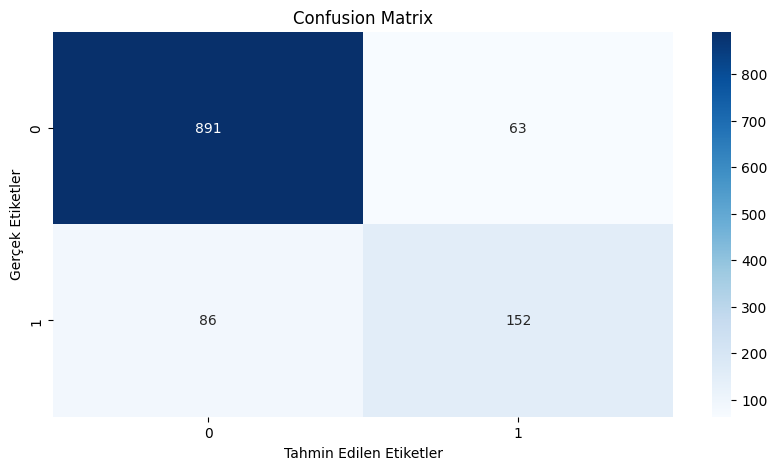

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Heatmap'i çizme
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Eksen etiketlerini ayarlama
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Edilen Etiketler")
plt.ylabel("Gerçek Etiketler")

# Grafiği gösterme
plt.show()

In [124]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk:", accuracy)

Doğruluk: 0.875


In [125]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Kesinlik:", precision)
print("Hassasiyet:", recall)

Kesinlik: 0.7069767441860465
Hassasiyet: 0.6386554621848739


In [126]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print("F1 Skoru:", f1)

F1 Skoru: 0.6710816777041941


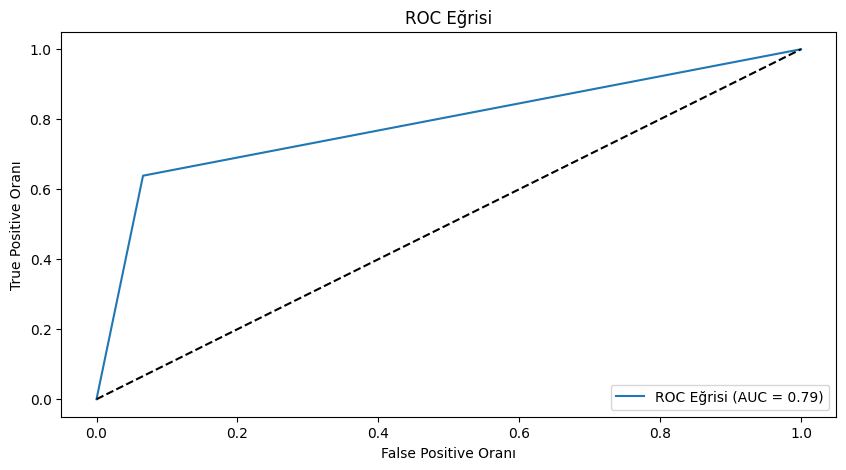

In [127]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label='ROC Eğrisi (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC Eğrisi')
plt.legend(loc='lower right')
plt.show()